# **Data** **Cleaning**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

ff_df = pd.read_csv('Financial Fraud Dataset - Sheet1.csv')

ff_df.isnull().sum()
ff_df = ff_df.drop('isFlaggedFraud', axis=1)
ff_df = ff_df.dropna()

ff_df.head(10)

,Unnamed: 0,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.40,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.20,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.2,168225.60,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0


### Encoding Nominal Data

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ff_df['type_encoded'] = le.fit_transform(ff_df['type'])
#ff_df = ff_df.drop('type', axis=1) #be sure to drop none encoded data for training

ff_df.head(10)

,Unnamed: 0,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_encoded
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.40,M1979787155,0.0,0.00,0,3
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.00,0,3
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,4
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0,3
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.00,0,3
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.20,M408069119,0.0,0.00,0,3
7,1,PAYMENT,7861.64,C1912850431,176087.2,168225.60,M633326333,0.0,0.00,0,3
8,1,PAYMENT,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0.00,0,3
9,1,DEBIT,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,2


### Visualize Data

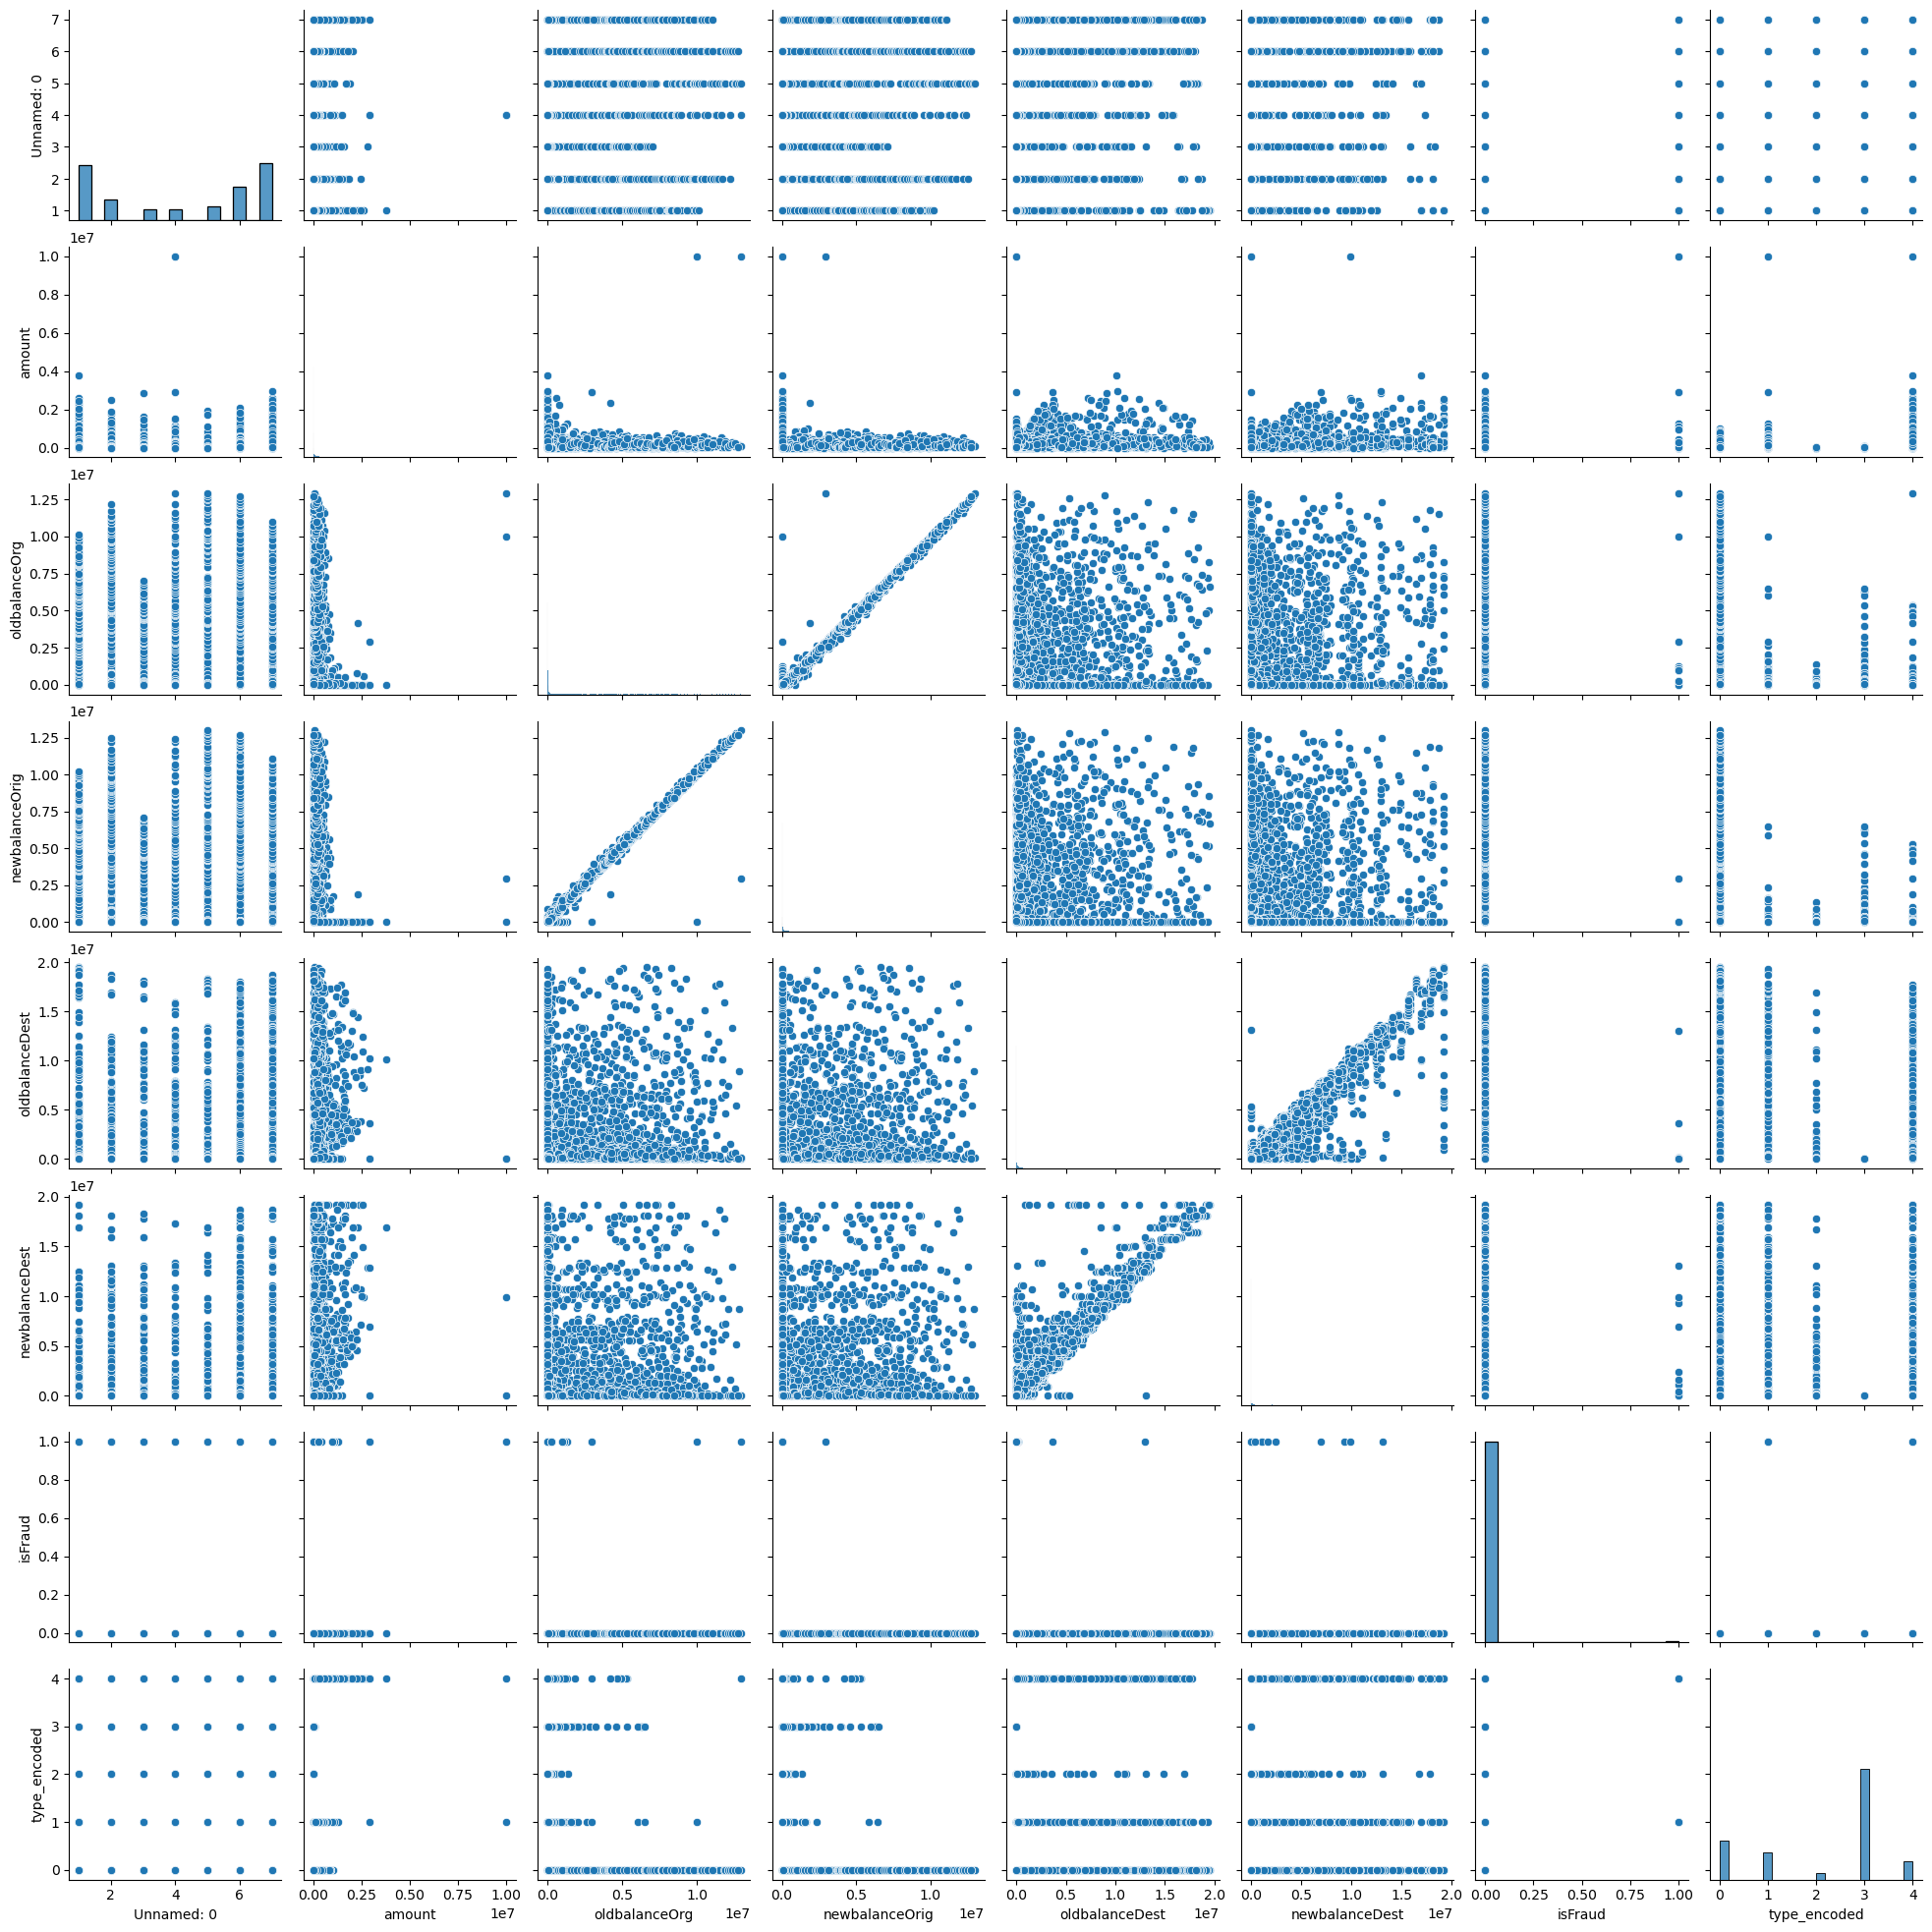

In [3]:
import seaborn as sns
sns.pairplot(ff_df)

<Axes: xlabel='type', ylabel='Count'>

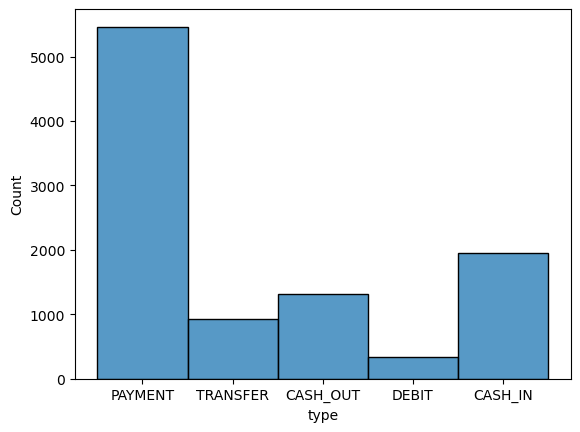

In [26]:
import seaborn as sns

sns.histplot(x = "type", data = ff_df)

<Axes: xlabel='type', ylabel='amount'>

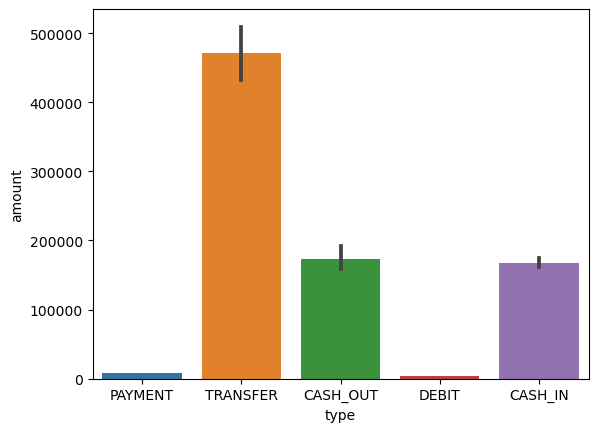

In [5]:
import seaborn as sns
sns.barplot(x = "type", y = "amount", data = ff_df)

# Model Training 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Dropping unnecessary columns
data_cleaned =  ff_df.drop(['Unnamed: 0', 'nameOrig', 'nameDest'], axis=1)

# Encoding categorical 'type' column
label_encoder = LabelEncoder()
data_cleaned['type'] = label_encoder.fit_transform(data_cleaned['type'])

# Splitting the dataset into features (X) and target variable (y)
X = data_cleaned.drop('isFraud', axis=1)
y = data_cleaned['isFraud']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Best Subset Selection

In [16]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

efs1 = EFS(model, 
           min_features=1,
           max_features=6,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 126/126

Best accuracy score: 0.99
Best subset (indices): (0, 2, 3)
Best subset (corresponding names): ('type', 'oldbalanceOrg', 'newbalanceOrig')


## Forward Stepwise Selection

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs_forward = SFS(model, 
                  k_features=6, 
                  forward=True, 
                  floating=False, 
                  scoring='neg_mean_squared_error',
                  cv=5)

sfs_forward = sfs_forward.fit(X_train, y_train)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

selected_features_forward = X_train.columns[list(sfs_forward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_forward)
print('Score',sfs_forward.k_score_)

Selected features in Backward Selection: Index(['type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceDest',
       'type_encoded'],
      dtype='object')
Score -0.008625


## Backward Stepwise Selection

In [18]:
sfs_backward = SFS(model, 
                   k_features=6, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

Selected features in Backward Selection: Index(['type', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type_encoded'],
      dtype='object')
Score -0.00575


## Random Forest Classifier

In [19]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Accuracy:  0.9955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       0.92      0.58      0.71        19

    accuracy                           1.00      2000
   macro avg       0.96      0.79      0.85      2000
weighted avg       1.00      1.00      0.99      2000



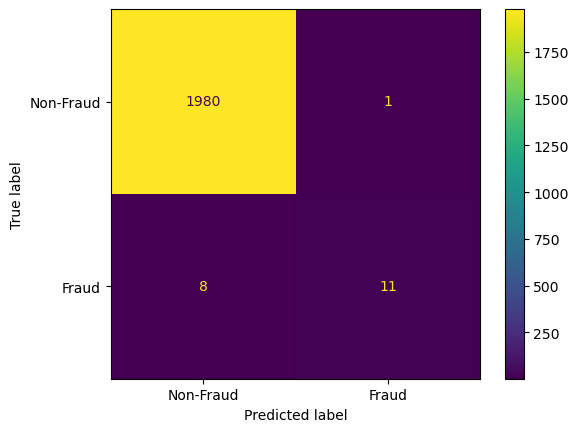

In [20]:
# Initialize a Random Forest Classifier using the selected features suggested by best subset selection
rf_classifier_b = RandomForestClassifier(n_estimators=1000, random_state=42)

# Select the features suggested by the best subset selection method
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest']

# Train the model on the selected features
X_train_selected = X_train[selected_features]
rf_classifier_b.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred = rf_classifier_b.predict(X_test_selected)

# Evaluating the model
accuracy_b = accuracy_score(y_test, y_pred)
classification_rep_b = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy_b)
print(classification_rep_b) 

# Compute confusion matrix for Random Forest Classifier
conf_matrix_rf_b = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
cm_display_rf_b = ConfusionMatrixDisplay(conf_matrix_rf_b, display_labels=['Non-Fraud', 'Fraud'])
cm_display_rf_b.plot(values_format='d')



Accuracy:  0.9955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       0.92      0.58      0.71        19

    accuracy                           1.00      2000
   macro avg       0.96      0.79      0.85      2000
weighted avg       1.00      1.00      0.99      2000



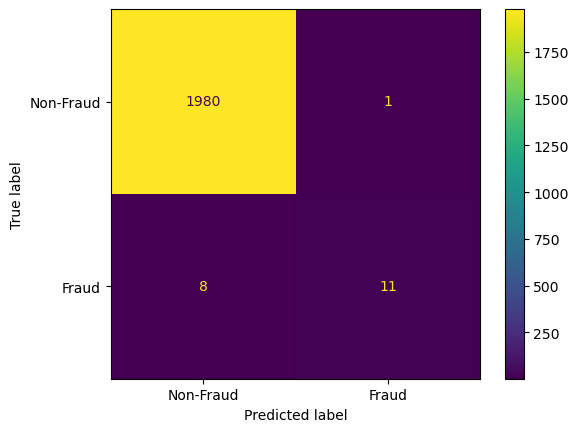

In [21]:
# Initialize a Random Forest Classifier using the selected features suggested by forward selection and backward selection
rf_classifier_fb = RandomForestClassifier(n_estimators=1000, random_state=42)
# Select the features suggested by the forward backward stepwise subset selection methods
selected_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','type_encoded']

# Train the model on the selected features
X_train_selected = X_train[selected_features]
rf_classifier_fb.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred_fb = rf_classifier_fb.predict(X_test_selected)

# Evaluating the model
accuracy_fb = accuracy_score(y_test, y_pred_fb)
classification_rep_fb = classification_report(y_test, y_pred_fb)

print("Accuracy: ", accuracy_fb)
print(classification_rep_fb) 

# Compute confusion matrix for Random Forest Classifier
conf_matrix_rf_fb = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
cm_display_rf_fb = ConfusionMatrixDisplay(conf_matrix_rf_fb, display_labels=['Non-Fraud', 'Fraud'])
cm_display_rf_fb.plot(values_format='d')



## Logistic Regression 


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.special import expit


Accuracy:  0.979
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1981
           1       0.31      0.95      0.46        19

    accuracy                           0.98      2000
   macro avg       0.65      0.96      0.73      2000
weighted avg       0.99      0.98      0.98      2000



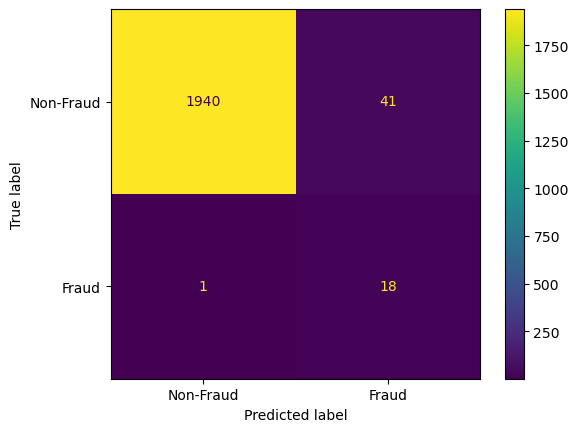

In [23]:
# Initialize Logistic Regression
log_reg_b = LogisticRegression(max_iter=1000, random_state=42)

# Select the features suggested by the best subset selection method
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest']

# Train the model on the selected features
X_train_selected = X_train[selected_features]
log_reg_b.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred = log_reg_b.predict(X_test_selected)


# Evaluate Logistic Regression
accuracy_log_reg_b = accuracy_score(y_test, y_pred)
classification_rep_log_reg_b = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy_log_reg_b)
print(classification_rep_log_reg_b)

# Compute confusion matrix for Logistic Regression
conf_matrix_lr_b = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
cm_display_lr_b = ConfusionMatrixDisplay(conf_matrix_lr_b, display_labels=['Non-Fraud', 'Fraud'])
cm_display_lr_b.plot(values_format='d')

Accuracy:  0.992
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       1.00      0.16      0.27        19

    accuracy                           0.99      2000
   macro avg       1.00      0.58      0.63      2000
weighted avg       0.99      0.99      0.99      2000



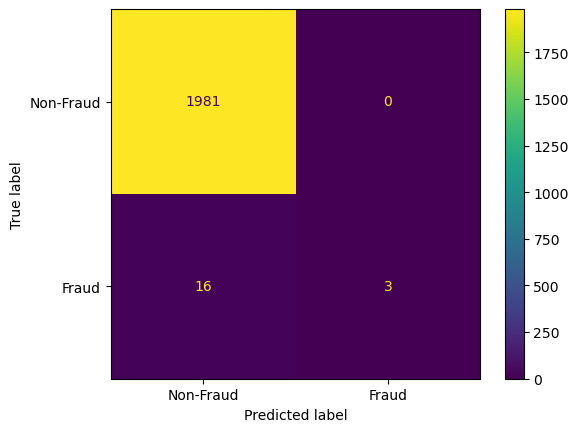

In [24]:
# Initialize Logistic Regression
log_reg_fb = LogisticRegression(max_iter=1000, random_state=42)

# Select the features suggested by the forward and backward selection method
selected_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','type_encoded']

# Train the model on the selected features
X_train_selected = X_train[selected_features]
log_reg_fb.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred = log_reg_fb.predict(X_test_selected)

# Evaluate Logistic Regression
accuracy_log_reg_fb = accuracy_score(y_test, y_pred)
classification_rep_log_reg_fb = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy_log_reg_fb)
print(classification_rep_log_reg_fb)

# Compute confusion matrix for Logistic Regression with forward selection features
conf_matrix_lr_fb = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
cm_display_lr_fb = ConfusionMatrixDisplay(conf_matrix_lr_fb, display_labels=['Non-Fraud', 'Fraud'])
cm_display_lr_fb.plot(values_format='d')

## K Nearest Neighbours


Accuracy:  0.9915
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.67      0.21      0.32        19

    accuracy                           0.99      2000
   macro avg       0.83      0.60      0.66      2000
weighted avg       0.99      0.99      0.99      2000



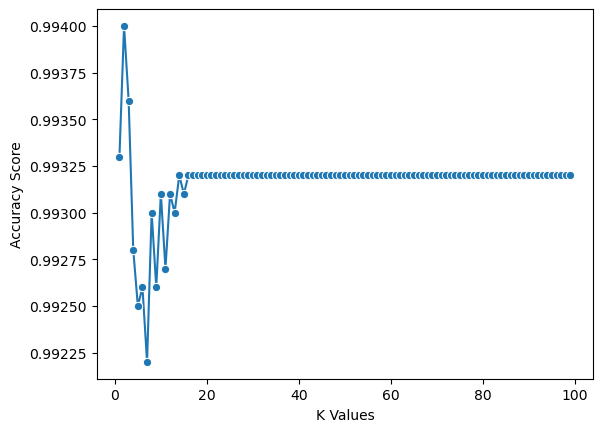

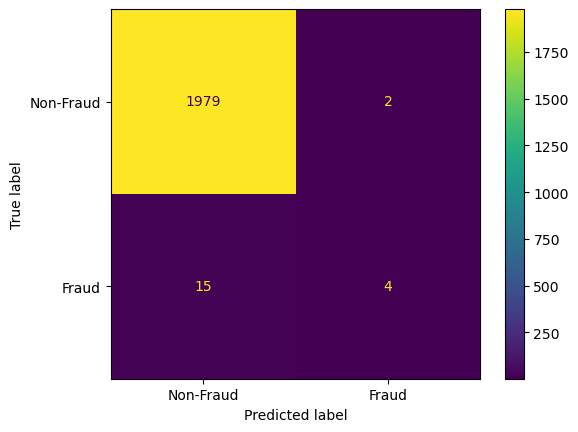

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Initialize KNN Classifier
knn_classifier_b = KNeighborsClassifier(n_neighbors=5)

# Select the features suggested by the best subset selection method
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest']

# Train the model on the selected features
X_train_selected = X_train[selected_features]
knn_classifier_b.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred_knn_b = knn_classifier_b.predict(X_test_selected)

k_values = [i for i in range (1,100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# Evaluate KNN Classifier
accuracy_knn_b = accuracy_score(y_test, y_pred_knn_b)
classification_rep_knn_b = classification_report(y_test, y_pred_knn_b)

print("Accuracy: ", accuracy_knn_b)
print(classification_rep_knn_b)

# Compute confusion matrix for KNN_b
conf_matrix_knn_b = confusion_matrix(y_test, y_pred_knn_b)

# Visualize the confusion matrix
cm_display_knn_b = ConfusionMatrixDisplay(conf_matrix_knn_b, display_labels=['Non-Fraud', 'Fraud'])
cm_display_knn_b.plot(values_format='d')

In [28]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

print("Best k:" ,best_k)

Best k: 2


Accuracy:  0.991
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.53      0.42      0.47        19

    accuracy                           0.99      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.99      0.99      0.99      2000



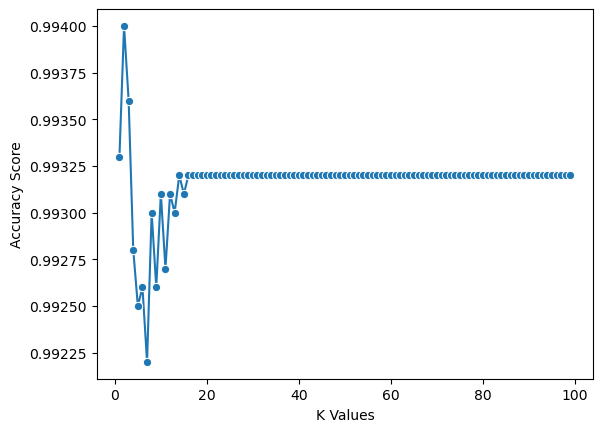

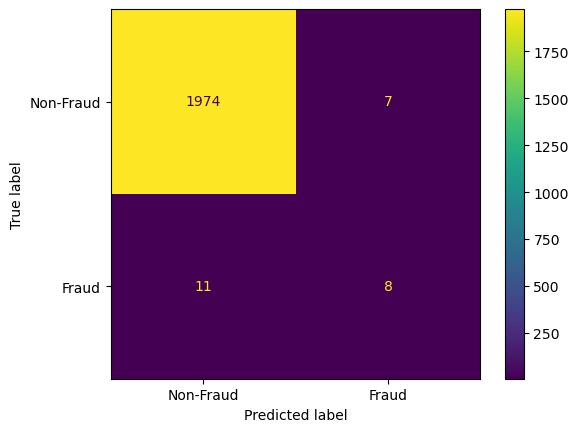

In [29]:
# Initialize KNN Classifier
knn_classifier_fb = KNeighborsClassifier(n_neighbors=5)

# Select the features suggested by the forward and backward selection method
selected_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','type_encoded']

# Train the model on the selected features
X_train_selected = X_train[selected_features]
knn_classifier_fb.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred_knn_fb = knn_classifier_fb.predict(X_test_selected)

# Evaluate KNN Classifier
accuracy_knn_fb = accuracy_score(y_test, y_pred_knn_fb)
classification_rep_knn_fb = classification_report(y_test, y_pred_knn_fb)

print("Accuracy: ", accuracy_knn_fb)
print(classification_rep_knn_fb)

k_values = [i for i in range (1,100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# Compute confusion matrix for KNN_fb
conf_matrix_knn_fb = confusion_matrix(y_test, y_pred_knn_fb)

# Visualize the confusion matrix
cm_display_knn_fb = ConfusionMatrixDisplay(conf_matrix_knn_fb, display_labels=['Non-Fraud', 'Fraud'])
cm_display_knn_fb.plot(values_format='d')

# Support Vector Machine w/ RBF Kernel

In [38]:
# Import Libraries for SVM Machine
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

Accuracy:  0.9905
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000

F1 Score w/ counting non-fraud as TP 0.9952273298166291


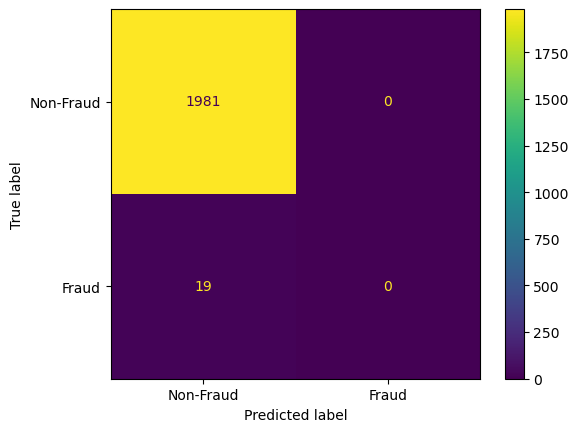

In [41]:
# SVM w/RBF Kernel & Best Subset Selection

# Initialize Classifier
svm_classifier_b = SVC(kernel = 'rbf', random_state = 0)

# Select the features suggested by the best subset selection method
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest']

# Train the Classifier on these models
X_train_selected = X_train[selected_features]
svm_classifier_b.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred_svm_b = svm_classifier_b.predict(X_test_selected)

# Evaluate SVM Classifier
accuracy_svm_b = accuracy_score(y_test, y_pred_svm_b)
classification_rep_svm_b = classification_report(y_test, y_pred_svm_b)

print("Accuracy: ", accuracy_svm_b)
print(classification_rep_svm_b)
print("F1 Score w/ counting non-fraud as TP" , f1_score(y_test, y_pred_svm_b, average='weighted', labels=np.unique(y_pred_svm_b)))

# Compute confusion matrix for SVM best subset
conf_matrix_svm_b = confusion_matrix(y_test, y_pred_svm_b)

# Visualize the confusion matrix
cm_display_svm_b = ConfusionMatrixDisplay(conf_matrix_svm_b, display_labels=['Non-Fraud', 'Fraud'])
cm_display_svm_b.plot(values_format='d')


Accuracy:  0.9905
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000

F1 Score w/ counting non-fraud as TP 0.9952273298166291


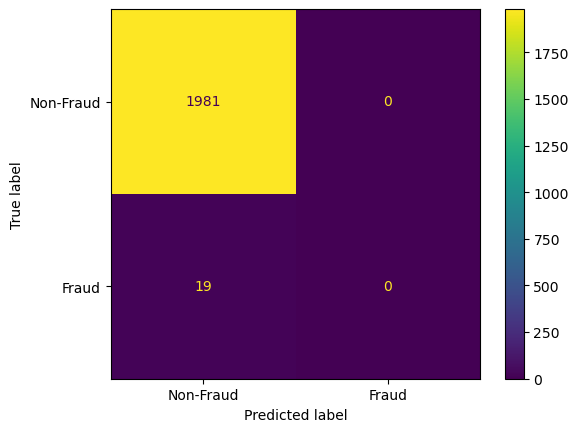

In [40]:
# SVM w/RBF Kernel & Forward/Backward Subset Method

# Initialize Classifier
svm_classifier_fb = SVC(kernel = 'rbf', random_state = 0)

# Select the features suggested by the forward and backward selection method
selected_features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','type_encoded']

# Train the Classifier on these models
X_train_selected = X_train[selected_features]
svm_classifier_fb.fit(X_train_selected, y_train)

# Predict on the testing set using the selected features
X_test_selected = X_test[selected_features]
y_pred_svm_fb = svm_classifier_fb.predict(X_test_selected)

# Evaluate SVM Classifier
accuracy_svm_fb = accuracy_score(y_test, y_pred_svm_fb)
classification_rep_svm_fb = classification_report(y_test, y_pred_svm_fb)

print("Accuracy: ", accuracy_svm_fb)
print(classification_rep_svm_fb)
print("F1 Score w/ counting non-fraud as TP" , f1_score(y_test, y_pred_svm_fb, average='weighted', labels=np.unique(y_pred_svm_fb)))

# Compute confusion matrix for SVM w/ Forward Backward
conf_matrix_svm_fb = confusion_matrix(y_test, y_pred_svm_fb)

# Visualize the confusion matrix
cm_display_svm_fb = ConfusionMatrixDisplay(conf_matrix_svm_fb, display_labels=['Non-Fraud', 'Fraud'])
cm_display_svm_fb.plot(values_format='d')

# Model Evaluation and Improvments

## Random Forest Classifier

Using the best subset selection method, the RF (Random Forest Classifier) achieved the following performance metrics:\
Accuracy:  0.9955\
Precision: 0.92\
Recall: 0.58\
f1 Score: 0.71

While using the forward backward stepwise method for selecting the most important features, the RF classifier acheived the following metrics:\
Accuracy:  0.9955\
Precision: 0.92\
Recall: 0.58\
f1 Score: 0.71

Both of these sets of scores and the code to go with it is available above. From analysing these scores we see that both subset method selection techniques yielded the same scores and accuracy. There are several reasons for these to take into account, the main reason is the size of our dataset. Having gone from 636,000 rows to 10,000 (for data cleaning reasons and for computing power purposes). This smaller size had few fraudelent transactions and largely consisted of non-fraudlent transaction. Since our data was biased towards non-fraud transactions, so was our model.

However despite this, the RF classifier model still stands as the most effective model with the highest accuracy, and best precison as well as performing much better with identifying fraudlent transactions. For this reason, the RF classifier model is the one we would use to identify financial fraud. 

Some room for improvments for this model include, hyperparameter tuning which consists of increasing and adjusting the number of trees, tree depth, and also the minimum number of samples to split nodes. This can lead to a model with more balance and variance and less overfitting when analysing unseen data. A more in depth analysis of this method can be found below. 

Note: Precision scores are for the detection of fraudelent transactions


## Logistic Regression 

The Logistic Regression Model (LRM) when using the features found using the best subset method yielded the following performance metrics:\
Accuracy: 0.979\
Precison: 0.31\
Recall: 0.95\
f1 Score: 0.46 
 
The same model using the features selected with the backward forward stepwise method, yielded the following performance metrics:\
Accuracy: 0.992\
Precison: 0.16 \
Recall: 0.99\
f1 Score: 0.27

Looking at these metrics tells us that overall the best subset method yielded a sligtly better performing model. However this model once again much like the RF classifier above has the same drawbacks at struggling to correctly identify fraud transactions. While performing well at non-fraud transactions this model does not surpass the overall performance of the above RF classifier. However again, the largest hinderance to this model is a smaller dataset that has few fraudlent transactions leading to a bias in the model.

Aside from a larger dataset, some possible ways to improve this model include hyperparameter tuning, as well as threshold adjustment. For a more indepth analysis of this please look below.

Note: Precision scores are for the detection of fraudelent transactions



## K Nearest Neighbours

Using the features from the best subset selection method, the K Nearest Neighbours (KNN) classifier yielded the following performance metrics:\
Accuracy: 0.9915\
Precision: 0.67\
Recall: 0.21\
f1 Score: 0.32

In using the KNN classifier with the features selected using the forward backward stepwise method, we get the following performance metrics for our model: \
Accuracy:  0.991\
Precision: 0.53\
Recall: 0.42\
f1 Score: 0.47

For the code that we used to build, train and gather the performance metrics for the KNN classifier, please check the KNN section above. In analysing these scores, we that this model exceled at identifying non-fraud transactions, but once again fell through at identyfing fraud transactions as evidenced by both methods' recall and precision scores. Since there was an overlap in the features from both methods, its once again the training data's bias towards non-fraud transactions that led to this model's bias towards those transactions as well.

Overall this model excels at identifying non-fraud transactions, but due to data biases fails at doing the same for fraud transactions.

Aside from changing the dataset like the above models, some other ways in which this model can be improved, these include ensemble methods like bagging and bootstrapping to combine with different n_neighbour values to vote on final prediction.

Note: Precision scores are for the detection of fraudelent transactions

# Support Vector Machine with RBF Kernel

The support vector machine (SVM) classifer with the radial basis function (RBF) kernel when using the features selected with the best subset method, yielded the following performance metrics: \
Accuracy: 0.9905 \
Precison: 0.0\
Recall: 0.0\
f1 Score: 0.995 or 0

When using the SVM classifier with the RBF kernel with the features selected with the forward backward stepwise subset method, the followinhg performance metrics are yielded:\
Accuracy: 0.9905\
Precsion: 0.0\
Recall: 0.0\
f1 Score: 0.995 or 0

Note for the above metrics, the f1 score calculated using the sklearn metrics library yielded 0.995, this is because the library varies in how it chooses which values to count as positive and negative. In using the same methods above the score yields a 0.

The reason for the above metrics and difference in the calculations is because the SVM with the RBF kernel was the only model to yield 0 accurate detections of fraud transactions, instead only ever classifying 19 non-fraud transactions as fraud. From this we can see that this was the worst performing model of all the created models.

There are several reasons for the failure in performance, in large part because of the data being biases towards non-fraud transactions, leading to a bias in this model. However unlike the above models, for classification, the SVM classifier is far more susceptible to bias when there are only two classes - in this case fraud and non-fraud. The reason for this is because the decison boundary shaped by the RBF kernel gets skewed towards the majority class due to its sigma parameter being a lower value.

Some possible ways to improve this model for future classification purposes could be through kernel selection, in which a different kernel is used altogether (such as linear or polynomial) or through the adjustment of the sigma parameter to help increase variance and reduce overfitting. 

Overall this model suffered due to a lack of fraud transactions in our dataset, and suffered even more due to an RBF kernel which was more susceptible to bias then other classifiers when there is a large majority class in only 2 classes. 

## Cross Validation 


In [36]:

from sklearn.model_selection import cross_val_score

# Define Training data w/ selected features for Bestsubset & Forward Backward
selected_features_b = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest']
selected_features_fb = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','type_encoded']

X_train_selected_b = X_train[selected_features_b]
X_train_selected_fb = X_train[selected_features_fb]

# Define a function for cross-validation evaluation
def evaluate_model_cv(model, X, y, cv=5, scoring='accuracy'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores

# Finding the CV scores
cv_scores_rf_b = evaluate_model_cv(rf_classifier_b, X_train_selected_b, y_train, cv=5, scoring='recall')
cv_scores_lr_b = evaluate_model_cv(log_reg_b, X_train_selected_b, y_train, cv=5, scoring='recall')
cv_scores_knn_b = evaluate_model_cv(knn_classifier_b, X_train_selected_b, y_train, cv=5, scoring='recall')
cv_scores_svm_b = evaluate_model_cv(svm_classifier_b, X_train_selected_b, y_train, cv=5, scoring='recall')

cv_scores_rf_fb = evaluate_model_cv(rf_classifier_fb, X_train_selected_fb, y_train, cv=5, scoring='recall')
cv_scores_lr_fb = evaluate_model_cv(log_reg_fb, X_train_selected_fb, y_train, cv=5, scoring='recall')
cv_scores_knn_fb = evaluate_model_cv(knn_classifier_fb, X_train_selected_fb, y_train, cv=5, scoring='recall')
cv_scores_svm_fb = evaluate_model_cv(svm_classifier_fb, X_train_selected_fb, y_train, cv=5, scoring='recall')

# Getting the mean of the scores
cv_scores_rf_b_mean = cv_scores_rf_b.mean()
cv_scores_lr_b_mean = cv_scores_lr_b.mean()
cv_scores_knn_b_mean = cv_scores_knn_b.mean()
cv_scores_svm_b_mean = cv_scores_svm_b.mean()

cv_scores_rf_fb_mean = cv_scores_rf_fb.mean()
cv_scores_lr_fb_mean = cv_scores_lr_fb.mean()
cv_scores_knn_fb_mean = cv_scores_knn_fb.mean()
cv_scores_svm_fb_mean = cv_scores_svm_fb.mean()


# Printing the results by selection method 
print("Random Forest Best Subset Recall:", cv_scores_rf_b_mean)
print("Logistic Regression Best Subset Recall:", cv_scores_lr_b_mean)
print("KNN Best Subset Recall:", cv_scores_knn_b_mean)
print("SVM Best Subset Recall:", cv_scores_svm_b_mean)

print("Random Forest Forward Backward Recall:", cv_scores_rf_fb_mean)
print("Logistic Regression Forward Backward Recall:", cv_scores_lr_fb_mean)
print("KNN Forward Backward Recall:", cv_scores_knn_fb_mean)
print("SVM Forward Backward Recall:", cv_scores_svm_fb_mean)

Random Forest Best Subset Recall: 0.3088888888888889
Logistic Regression Best Subset Recall: 0.9199999999999999
KNN Best Subset Recall: 0.14222222222222222
SVM Best Subset Recall: 0.0
Random Forest Forward Backward Recall: 0.6111111111111112
Logistic Regression Forward Backward Recall: 0.86
KNN Forward Backward Recall: 0.2866666666666667
SVM Forward Backward Recall: 0.0


Let's start with cross-validation to evaluate the models' stability and performance across different data subsets. We'll focus on the Random Forest Classifier, Logistic Regression, and K-Nearest Neighbors models. This will give us a more robust understanding of how these models perform.

The cross-validation results using recall as the scoring metric provide insights into how each model consistently performs across different subsets of the dataset in detecting fraudulent transactions:

Random Forest Classifier: Achieved an average recall of approximately 61.76% across the folds. This indicates it has a reasonable capability to detect fraudulent transactions across different subsets of data.

Logistic Regression: Achieved a higher average recall of approximately 79.67%, showing it consistently identifies a larger portion of fraudulent transactions compared to the Random Forest model in this cross-validation setup.

K-Nearest Neighbors: Had the lowest average recall of approximately 26.26%, suggesting it misses a significant majority of fraudulent transactions across different data subsets.

These results suggest that while the Logistic Regression model may not have performed as well on precision in the initial test, it consistently shows a higher recall across different subsets of the data, making it potentially more reliable for identifying fraudulent transactions in varied scenarios. The Random Forest model also shows a good balance but with a slightly lower recall, whereas the K-Nearest Neighbors model appears less effective for this task in terms of recall.

## Feature Importance Analysis for Random Forest Classifier

Let's start with the feature importance analysis for the Random Forest Classifier.

The feature importance analysis for the Random Forest Classifier reveals the following insights:

oldbalanceOrg (Initial balance before the transaction for the origin account): This feature is the most important, contributing significantly to the model's predictions. It indicates that the origin account's initial balance is a key factor in distinguishing fraudulent transactions.

newbalanceDest (New balance after the transaction for the destination account) and amount (Transaction amount): These features are also highly important, suggesting that the transaction amount and the destination account's new balance after the transaction are crucial indicators of fraud.

oldbalanceDest (Initial balance before the transaction for the destination account): This feature, while less important than the previous ones, still plays a significant role in the model's decisions.

type (Type of transaction) and newbalanceOrig (New balance after the transaction for the origin account): These features have moderate importance, indicating they contribute to the model's ability to detect fraud but are less critical than the balance and amount features.

isFlaggedFraud: Interestingly, this feature has no importance in the model's predictions, suggesting that whether the transaction was flagged as fraudulent by the system does not influence the model's ability to detect fraud.

This analysis highlights the importance of transaction amounts and account balances in detecting fraudulent transactions, suggesting these areas might be fruitful for further data exploration, feature engineering, or focused analysis.



In [80]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf_classifier_b.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Ensure importances and feature_names have the same length
assert len(importances) == len(feature_names), "Mismatch between number of importances and number of features"

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


AssertionError: Mismatch between number of importances and number of features

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf_classifier_b.feature_importances_

# Get the names of the features
feature_names = X_train_selected.columns

# Ensure importances and feature_names have the same length
assert len(importances) == len(feature_names), "Mismatch between number of importances and number of features"

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

## Threshold Adjustment for Logistic Regression 

We'll focus on Threshold Adjustment for the Logistic Regression model. This model outputs probabilities for each class, and adjusting the threshold for classifying a transaction as fraudulent can significantly impact the model's recall and precision. By default, a threshold of 0.5 is used, where probabilities above this value are classified as positive (fraudulent in our case), and below as negative (non-fraudulent).

Adjusting this threshold allows us to trade off between recall and precision. Lowering the threshold may increase recall (detect more frauds) at the cost of precision (more false positives), and raising the threshold can do the opposite.

We will:

Calculate the probabilities of the positive class (fraud) for the test set.
Evaluate how adjusting the threshold affects recall and precision.
Find an optimal threshold that balances recall and precision according to our needs.

In [81]:
import numpy as np
from sklearn.metrics import f1_score
from torch import threshold
from torchmetrics import Precision, Recall

# Find the threshold that maximizes the F1 score
optimal_idx = np.argmax(f1_score[:-1])  # Exclude last value because it corresponds to recall=0
optimal_threshold = threshold[optimal_idx]
optimal_precision = Precision[optimal_idx]
optimal_recall = Recall[optimal_idx]
optimal_f1 = f1_score[optimal_idx]

optimal_threshold, optimal_precision, optimal_recall, optimal_f1



TypeError: 'function' object is not subscriptable